# importing the libraries

In [1]:
import numpy as np
import pandas as pd0
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

# Loading the dataset

In [3]:
train_dir=r'C:/Users/Vamsi/Documents/breast/data/train'
validation_dir=r'C:/Users/Vamsi/Documents/breast/data/validation'
test_dir=r'C:/Users/Vamsi/Documents/breast/data/test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# DATA AUGUMENTATION

In [126]:
train_datagen=ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)


test_datagen = ImageDataGenerator(rescale=1./255)




In [127]:
train_generator = train_datagen.flow_from_directory(
            train_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
            validation_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary')

Found 4192 images belonging to 2 classes.
Found 2223 images belonging to 2 classes.


In [6]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [7]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

from tensorflow.keras import optimizers
#Cross-entropy loss, measures the performance of a classification model whose output is a probability value between 0 and 1
#Cross-entropy loss increases as the predicted probability diverges from the actual label
model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  metrics=['acc'])

c:\Users\Vamsi\anaconda3\lib\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [130]:
history = model.fit_generator(
          train_generator,
          steps_per_epoch=50,   #total_training_images/batch_size
          epochs=10,
          validation_data=validation_generator,
          validation_steps=50,
          )

C:\Users\Vamsi\AppData\Local\Temp/ipykernel_27244/575911371.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
50/50 [==============================] - 72s 1s/step - loss: 0.3656 - acc: 0.8506 - val_loss: 1.1294 - val_acc: 0.8294
Epoch 2/10
50/50 [==============================] - 71s 1s/step - loss: 0.3855 - acc: 0.8269 - val_loss: 1.1370 - val_acc: 0.8244
Epoch 3/10
50/50 [==============================] - 71s 1s/step - loss: 0.3665 - acc: 0.8475 - val_loss: 1.6776 - val_acc: 0.8238
Epoch 4/10
50/50 [==============================] - 72s 1s/step - loss: 0.3699 - acc: 0.8450 - val_loss: 1.8222 - val_acc: 0.8244
Epoch 5/10
50/50 [==============================] - 71s 1s/step - loss: 0.3844 - acc: 0.8356 - val_loss: 1.1928 - val_acc: 0.7800
Epoch 6/10
50/50 [==============================] - 70s 1s/step - loss: 0.3708 - acc: 0.8444 - val_loss: 1.0997 - val_acc: 0.8231
Epoch 7/10
50/50 [==============================] - 70s 1s/step - loss: 0.3681 - acc: 0.8406 - val_loss: 1.5245 - val_acc: 0.7981
Epoch 8/10
50/50 [==============================] - 71s 1s/step - loss: 0.3701 - acc: 0.83

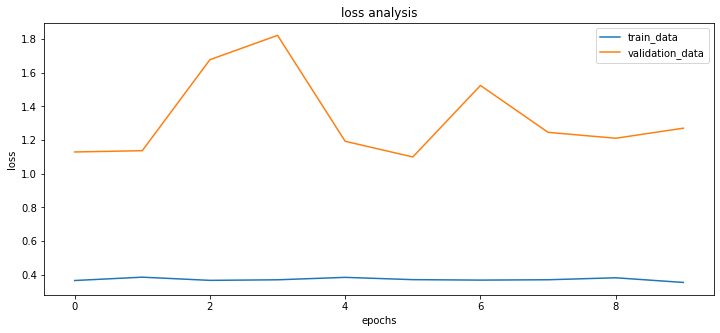

In [146]:
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_data','validation_data'])
plt.title('loss analysis')
plt.show()

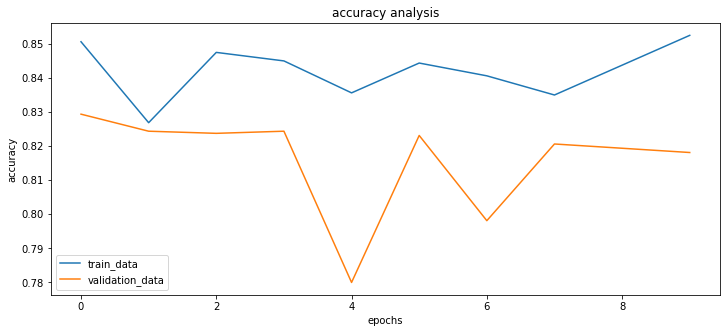

In [147]:
plt.figure(figsize=(12,5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_data','validation_data'])
plt.title('accuracy analysis')
plt.show()

LOADING TEST FILE

In [131]:
test_generator = test_datagen.flow_from_directory(
            test_dir,
            target_size=(150, 150),
            batch_size=32,
            class_mode='binary',
            shuffle=False)

Found 1494 images belonging to 2 classes.


PREDICTION USING TEST DATA

In [139]:
y_pred=model.predict(test_generator[1][0])


In [140]:
for i in range(len(y_pred)):
    if y_pred[i]>0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0
y_pred=y_pred.astype(int)

PREDICTED CLASSES

In [141]:
class_names=['benign','malignant']
np.array(class_names)[y_pred]

array([['malignant'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['malignant'],
       ['malignant'],
       ['malignant'],
       ['benign'],
       ['benign'],
       ['malignant'],
       ['malignant'],
       ['benign'],
       ['malignant'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['malignant'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['malignant'],
       ['malignant'],
       ['benign'],
       ['benign'],
       ['benign'],
       ['benign']], dtype='<U9')

TEST ACCURACY

In [143]:
loss,accuracy=model.evaluate(test_generator, steps=40)

40/40 [==============================] - 22s 546ms/step - loss: 0.2211 - acc: 0.9273
